# Task 1

In [1]:
import pandas as pd
from sklearn import metrics, tree, ensemble
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('bioresponse.csv')
df.head(5)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


## Training classifiers

In [3]:
X = df.iloc[:, 1:]
y = df.iloc[:, :1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1, shuffle=True)

In [4]:
def model_fitting(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = model.predict_proba(X_test)

    print('Accuracy = ', metrics.accuracy_score(y_test, preds))
    print('Precision = ', metrics.precision_score(y_test, preds))
    print('Recall = ', metrics.recall_score(y_test, preds))
    print('F1_score = ', metrics.f1_score(y_test, preds))
    print('Log_loss = ', metrics.log_loss(y_test, preds))

    return y_test, score[:, 1]

In [5]:
def curves(y_true, y_score):
    figure, ax = plt.subplots(2, figsize=(10, 10))

    precision = metrics.precision_recall_curve(y_true, y_score)
    roc = metrics.roc_curve(y_true, y_score)

    ax[0].plot(precision[0], precision[1])
    ax[0].set(xlabel='Recall')
    ax[0].set(ylabel='Precision')
    ax[0].set_title('Precision-Recall Curve')

    ax[1].plot(roc[0], roc[1])
    ax[1].plot(roc[1], roc[1], linestyle='dotted')
    ax[1].set(xlabel= 'FP')
    ax[1].set(ylabel= 'TP')
    ax[1].set_title('ROC-curve')


    plt.show()

In [6]:
cls_1 = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
SDT_true, SDT_score = model_fitting(cls_1, X_train, y_train, X_test, y_test)

Accuracy =  0.7515991471215352
Precision =  0.7422680412371134
Recall =  0.8388349514563107
F1_score =  0.7876025524156791
Log_loss =  8.95327424271247


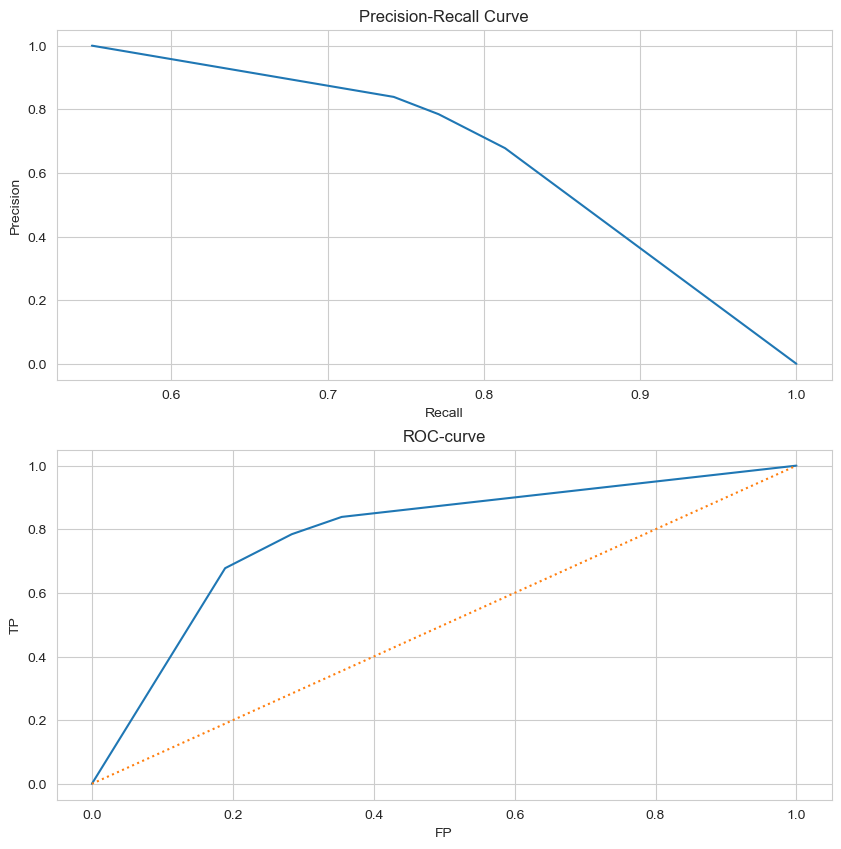

In [7]:
curves(SDT_true, SDT_score)

In [8]:
cls_2 = tree.DecisionTreeClassifier(max_depth=10, random_state=1)
DDT_true, DDT_score = model_fitting(cls_2, X_train, y_train, X_test, y_test)

Accuracy =  0.755863539445629
Precision =  0.7894736842105263
Recall =  0.7572815533980582
F1_score =  0.7730426164519326
Log_loss =  8.79956996386762


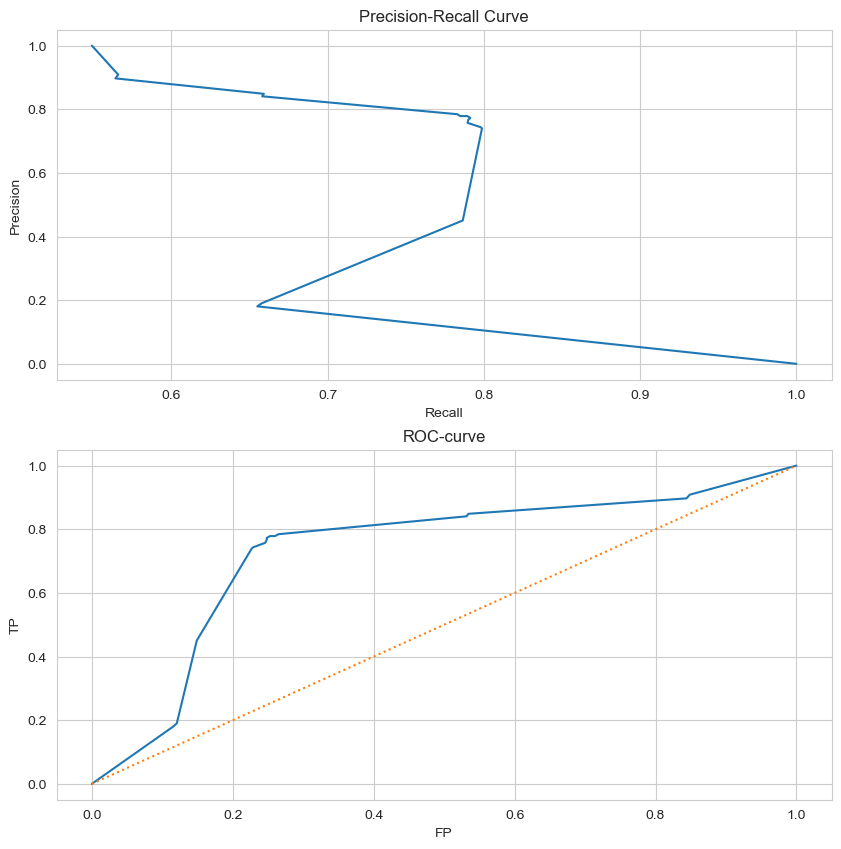

In [9]:
curves(DDT_true, DDT_score)

In [10]:
cls_3 = ensemble.RandomForestClassifier(max_depth=2, random_state=1)
SRF_true, SRF_score = model_fitting(cls_3, X_train, y_train, X_test, y_test)

Accuracy =  0.7025586353944563
Precision =  0.697986577181208
Recall =  0.8077669902912621
F1_score =  0.7488748874887488
Log_loss =  10.720873449428236


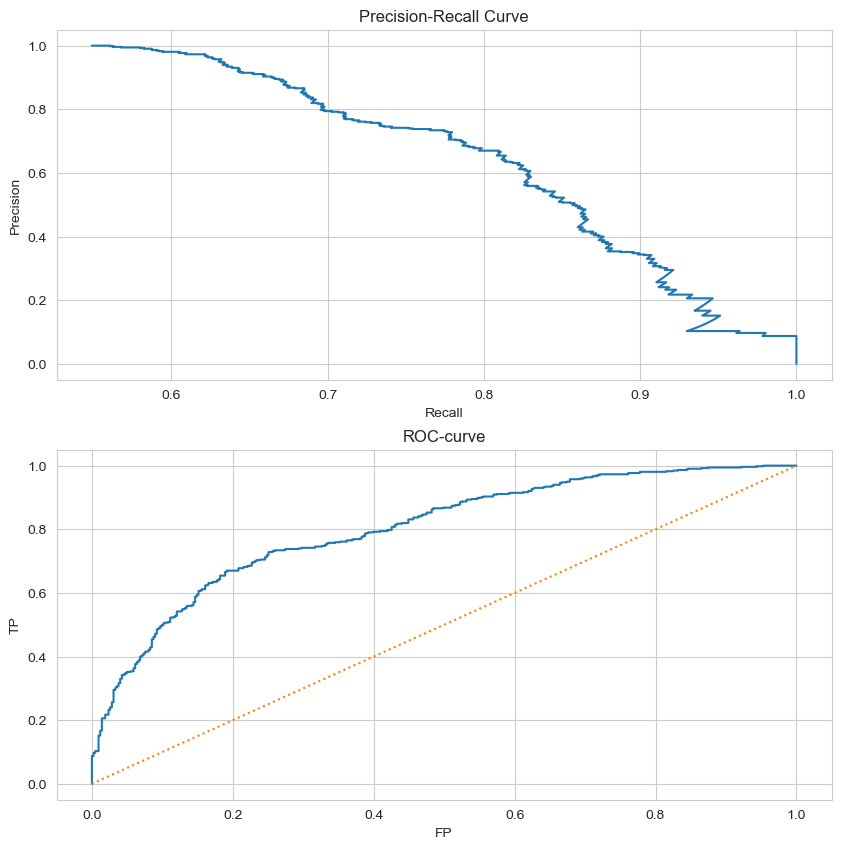

In [11]:
curves(SRF_true, SRF_score)

In [12]:
cls_4 = ensemble.RandomForestClassifier(max_depth=10, random_state=1)
DRF_true, DRF_score = model_fitting(cls_4, X_train, y_train, X_test, y_test)

Accuracy =  0.7803837953091685
Precision =  0.8096192384769539
Recall =  0.7844660194174757
F1_score =  0.7968441814595661
Log_loss =  7.915770360509736


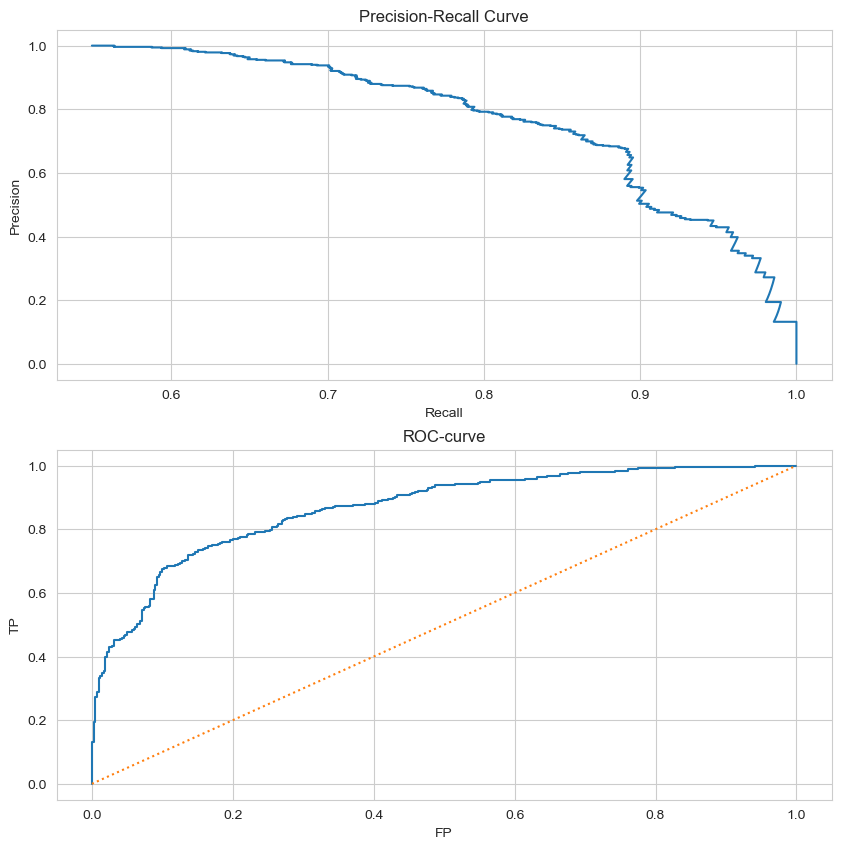

In [13]:
curves(DRF_true, DRF_score)

## Avoiding Type II Errors

In [62]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
rs = RandomizedSearchCV(cls_4,
                        param_dist,
                        n_iter = 100,
                        cv = 3,
                        scoring='recall',
                        verbose = 1,
                        n_jobs=-1,
                        # refit="precision"
                        )
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/kate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686:

{'n_estimators': 577,
 'min_samples_split': 50,
 'min_samples_leaf': 39,
 'max_features': 'log2',
 'max_depth': 1,
 'bootstrap': True}

Accuracy =  0.5618336886993603
Precision =  0.5562770562770563
Recall =  0.9980582524271845
F1_score =  0.7143849895760944
Log_loss =  15.793114651308258


<Axes: >

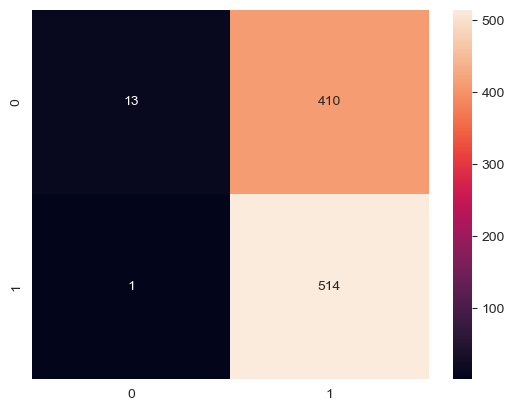

In [69]:
RFC = ensemble.RandomForestClassifier(n_estimators=577, min_samples_split=50, min_samples_leaf=39, max_features='log2', max_depth=1, bootstrap=True)
RFC_true, RFC_score = model_fitting(RFC, X_train, y_train, X_test, y_test)

cm = metrics.confusion_matrix(y_test, RFC.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

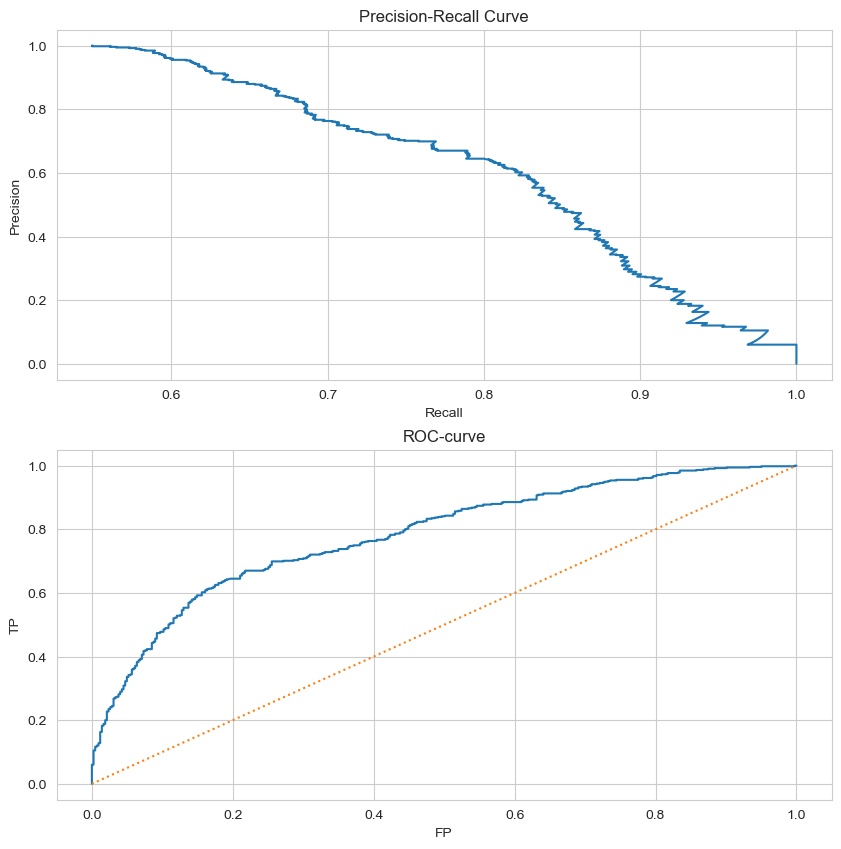

In [70]:
curves(RFC_true, RFC_score)

Even though recall value is reached, the model accuracy is not quite satisfactory